In [1]:
import os

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the current working directory
cwd = os.getcwd()

# Go up two levels
parent_dir = os.path.dirname(cwd)
grandparent_dir = os.path.dirname(parent_dir)

# Change the working directory
os.chdir(grandparent_dir)

print(f"Set working  directory to:{os.getcwd()}")

Set working  directory to:c:\Users\sega9\Documents\GA Tech\2024.Fall\ISYE 7406\Project\apartments


In [3]:
df = pd.read_csv('data_modified/engineered_data.csv', encoding='utf-8')

### **Basic Information and Summary Statistics**

In [4]:
df.head()

,bathrooms,bedrooms,has_photo,price,square_feet,cityname,state,source,zipcode,POPULATION,...,has_Washer_Dryer,has_View,has_Alarm,has_Golf,has_AC,has_count,has_address,log1p_price,log1p_square_feet,log1p_POP_SQMI
0,1.0,1.0,Thumbnail,2195.0,542,Redondo Beach,CA,RentLingo,90503.0,45679.0,...,0,0,0,0,0,0,1,7.694393,6.297109,8.917966
1,1.5,3.0,Thumbnail,1250.0,1500,Newport News,VA,RentLingo,23606.0,30476.0,...,0,0,0,0,0,0,1,7.131699,7.313887,7.975572
2,2.0,3.0,Thumbnail,1395.0,1650,Raleigh,NC,RentLingo,27609.0,37256.0,...,0,0,0,0,0,0,1,7.241366,7.409136,8.098418
3,1.0,2.0,Thumbnail,1600.0,820,Other,CA,RentLingo,95688.0,36677.0,...,0,0,0,0,0,0,1,7.378384,6.710523,6.001514
4,1.0,1.0,Thumbnail,975.0,624,Other,NM,RentLingo,87106.0,26582.0,...,0,0,0,0,0,0,1,6.883463,6.437752,7.644508


In [5]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87063 entries, 0 to 87062
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bathrooms               87063 non-null  float64
 1   bedrooms                87063 non-null  float64
 2   has_photo               87063 non-null  object 
 3   price                   87063 non-null  float64
 4   square_feet             87063 non-null  int64  
 5   cityname                87063 non-null  object 
 6   state                   87063 non-null  object 
 7   source                  87063 non-null  object 
 8   zipcode                 87063 non-null  float64
 9   POPULATION              87063 non-null  float64
 10  POP_SQMI                87063 non-null  float64
 11  perc_sub25k             87063 non-null  float64
 12  perc_25_50k             87063 non-null  float64
 13  perc_50_75k             87063 non-null  float64
 14  perc_75_100k            87063 non-null

In [6]:
# Check for missing values
print(df.isnull().sum())

bathrooms                 0
bedrooms                  0
has_photo                 0
price                     0
square_feet               0
cityname                  0
state                     0
source                    0
zipcode                   0
POPULATION                0
POP_SQMI                  0
perc_sub25k               0
perc_25_50k               0
perc_50_75k               0
perc_75_100k              0
perc_100_200k             0
perc_abv200k              0
description_len           0
cats_allowed              0
dogs_allowed              0
has_Fireplace             0
has_Gym                   0
has_Parking               0
has_Pool                  0
has_Storage               0
has_Wood_Floors           0
has_Gated                 0
has_Dishwasher            0
has_Clubhouse             0
has_Refrigerator          0
has_Elevator              0
has_Patio_Deck            0
has_Cable_or_Satellite    0
has_Garbage_Disposal      0
has_Internet_Access       0
has_Luxury          

### **Distribution of Key Numerical Features**

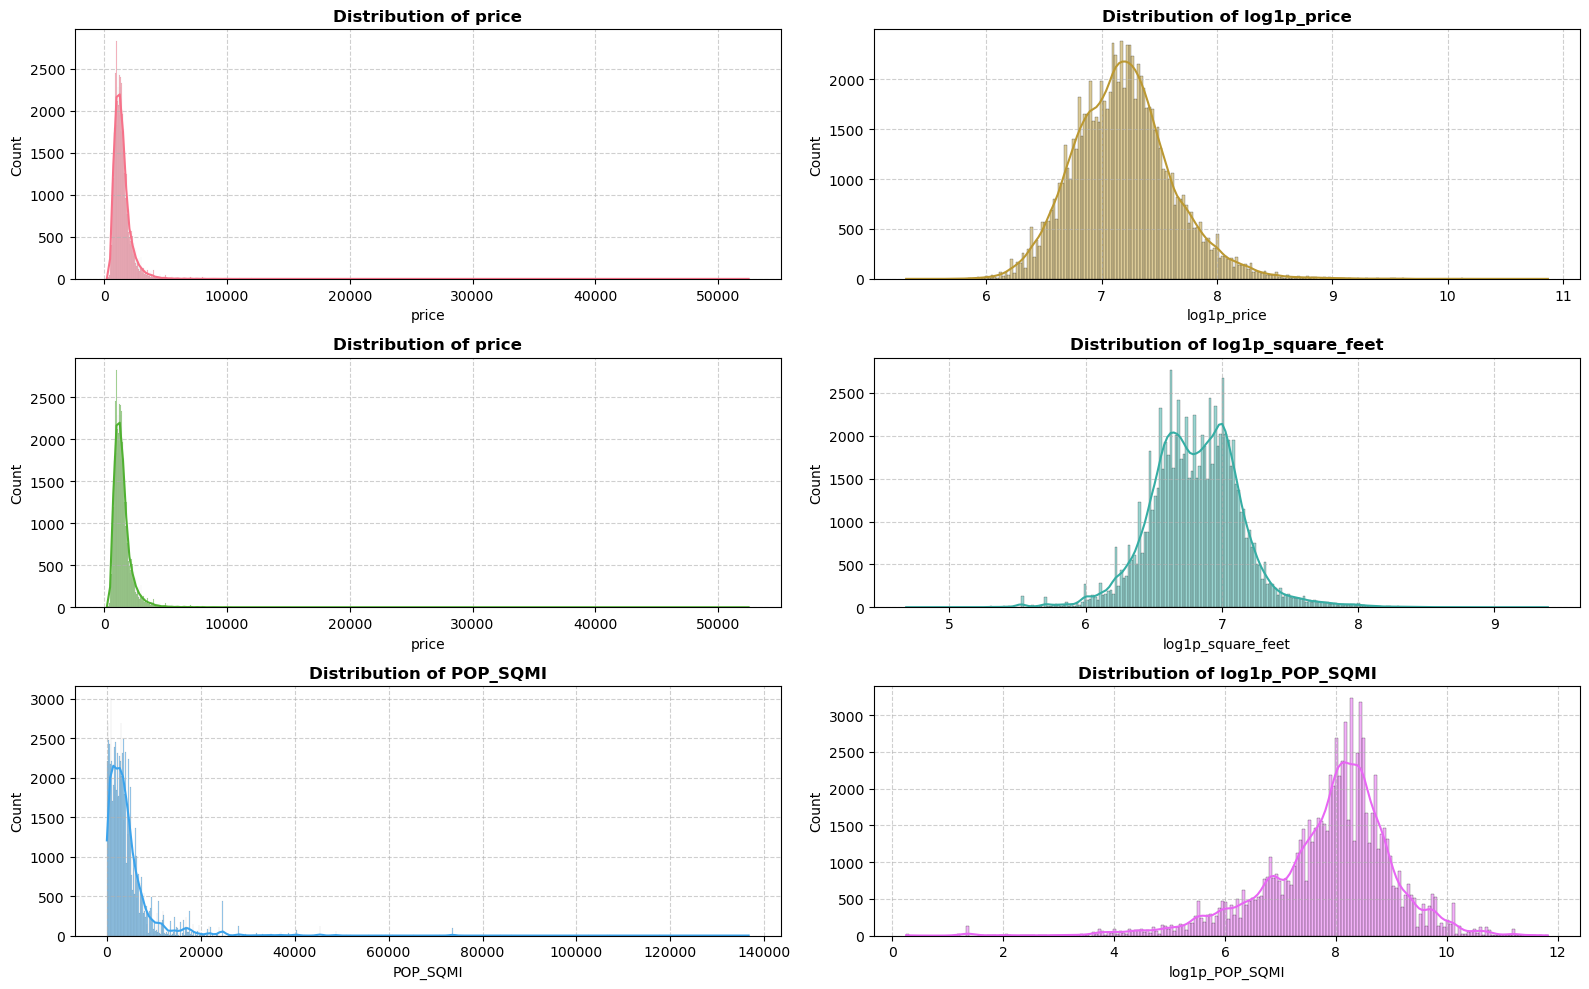

In [7]:
# Distribution of key numerical features
# numerical_features = ['price', 'log1p_price', 'square_feet', 'log1p_square_feet', 'POPULATION', 'POP_SQMI']
numerical_features = ['price', 'log1p_price', 'price', 'log1p_square_feet', 'POP_SQMI','log1p_POP_SQMI']
plt.figure(figsize=(16, 10))

# Generate distinct colors for each plot using 'husl' palette
colors = sns.color_palette('husl', len(numerical_features))

# Create subplots (3 rows x 2 columns)
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    
    # Plotting histogram with KDE
    sns.histplot(df[feature], kde=True, color=colors[i])
    
    # Add title and format it
    plt.title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    
    # Add grid for better visibility
    plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the layout
plt.tight_layout()
plt.show()


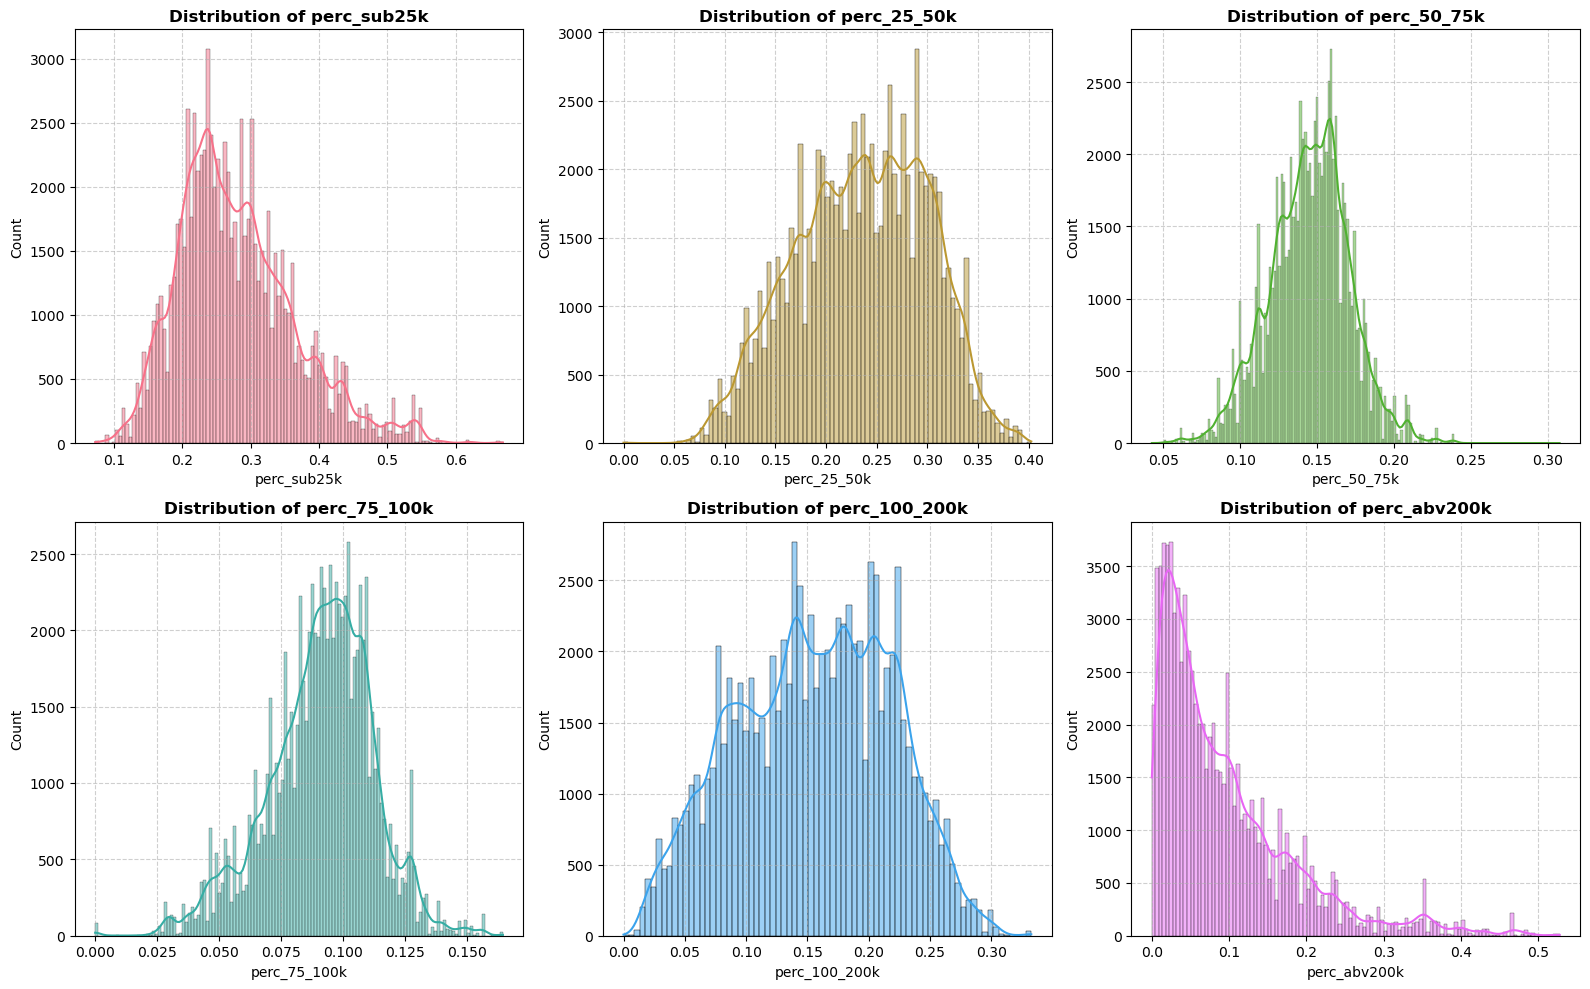

In [8]:
# Distribution of income percentage features
income_features = ['perc_sub25k', 'perc_25_50k', 'perc_50_75k', 'perc_75_100k', 'perc_100_200k', 'perc_abv200k']
plt.figure(figsize=(16, 10))

# Use 'husl' palette for distinct colors
colors = sns.color_palette('husl', len(income_features))

# Create 4 subplots for income percentage features
for i, feature in enumerate(income_features):
    plt.subplot(2, 3, i + 1)  # Arranging plots in a 2x3 grid
    
    sns.histplot(df[feature], kde=True, color=colors[i])
    
    # Add title and format it
    plt.title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    
    # Adding light gridlines for better visibility
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### **Categorical Feature Analysis**

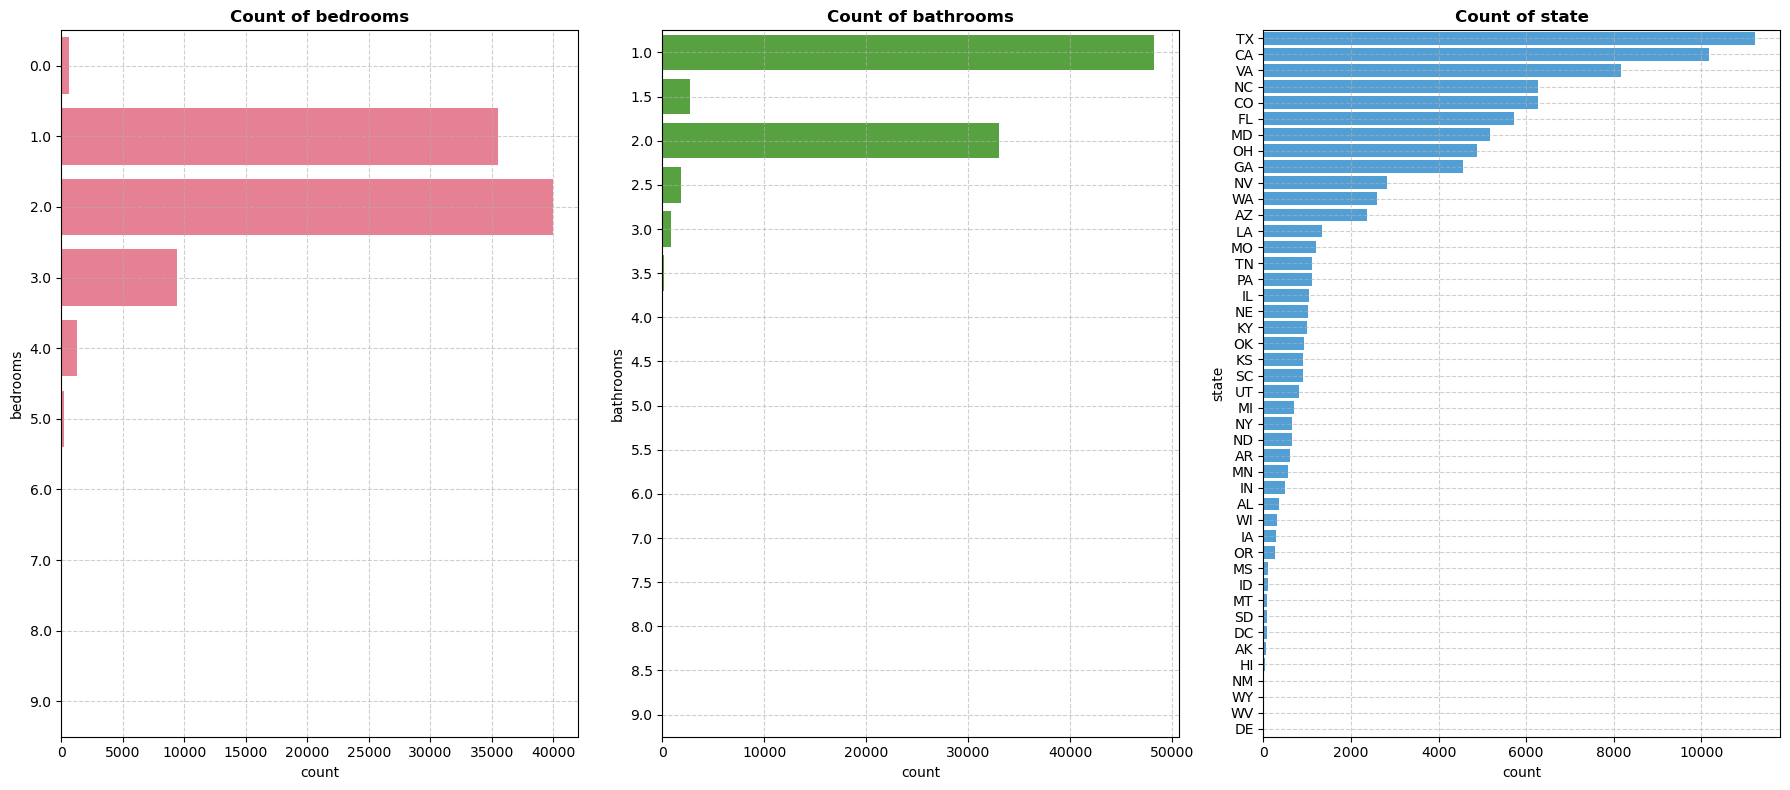

In [9]:
# Categorical feature analysis with distinct colors for each plot
categorical_features = ['bedrooms', 'bathrooms', 'state']
plt.figure(figsize=(18, 8))

# 'husl' color palette for distinct colors
colors = sns.color_palette('husl', len(categorical_features))

# Create 4 subplots (adjusted to fit the number of categories)
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)  # Arranging plots in 1x3 grid
    
    # Sort values numerically for bedrooms and bathrooms
    if feature in ['bedrooms', 'bathrooms']:
        sorted_order = sorted(df[feature].dropna().unique())
    else:
        sorted_order = df[feature].value_counts().index  # Default sorting
    
    sns.countplot(y=df[feature], order=sorted_order, palette=[colors[i]])
    
    # Add title and format
    plt.title(f'Count of {feature}', fontsize=12, fontweight='bold')
    
    # Adding light gridlines
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### **Correlation Heatmap**

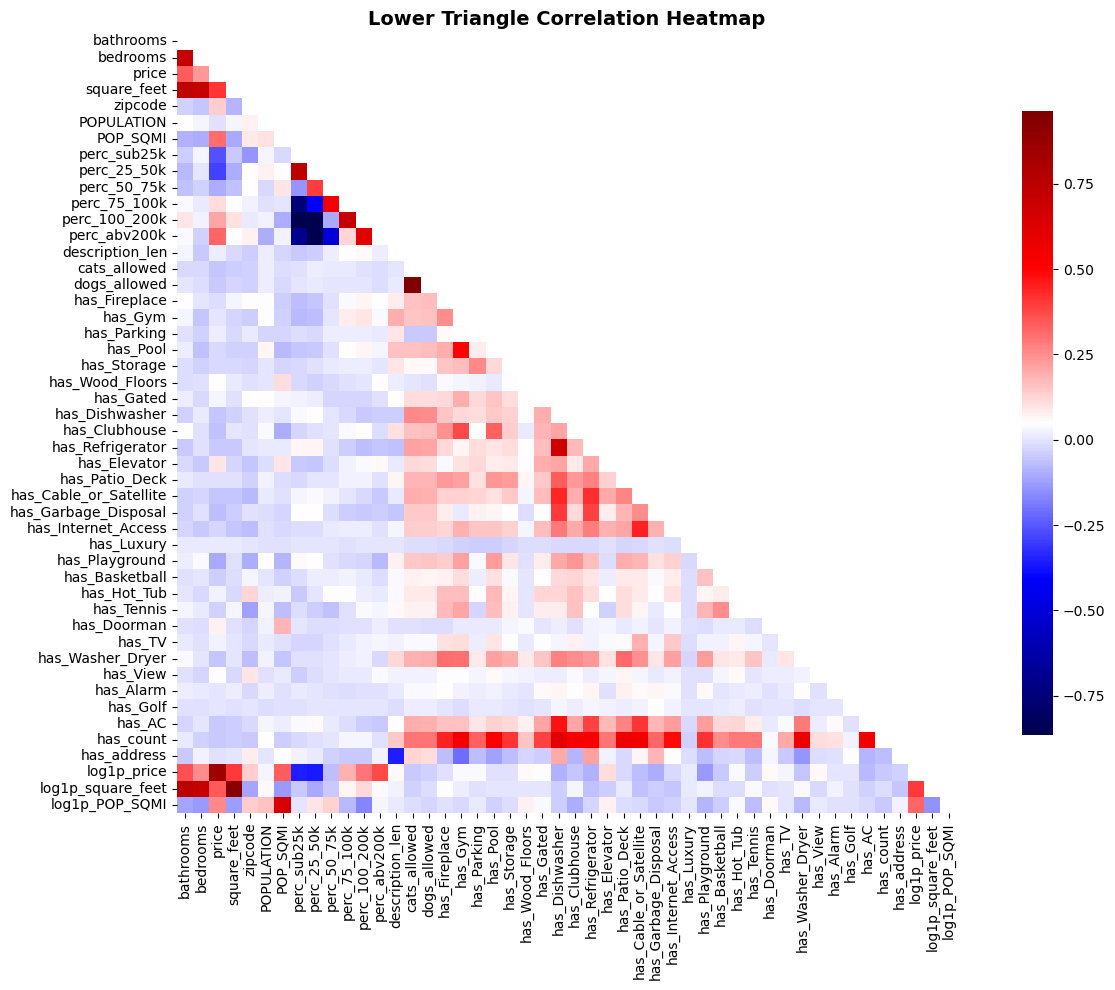

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Correlation heatmap with a cool-to-warm color map
plt.figure(figsize=(14, 10))

# Use 'seismic' color palette and annotations off for better readability
sns.heatmap(corr_matrix, mask=mask, cmap='seismic', square=True, annot=False, cbar_kws={"shrink": .8})

# Add title and format
plt.title('Lower Triangle Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### **Price vs Key Features**


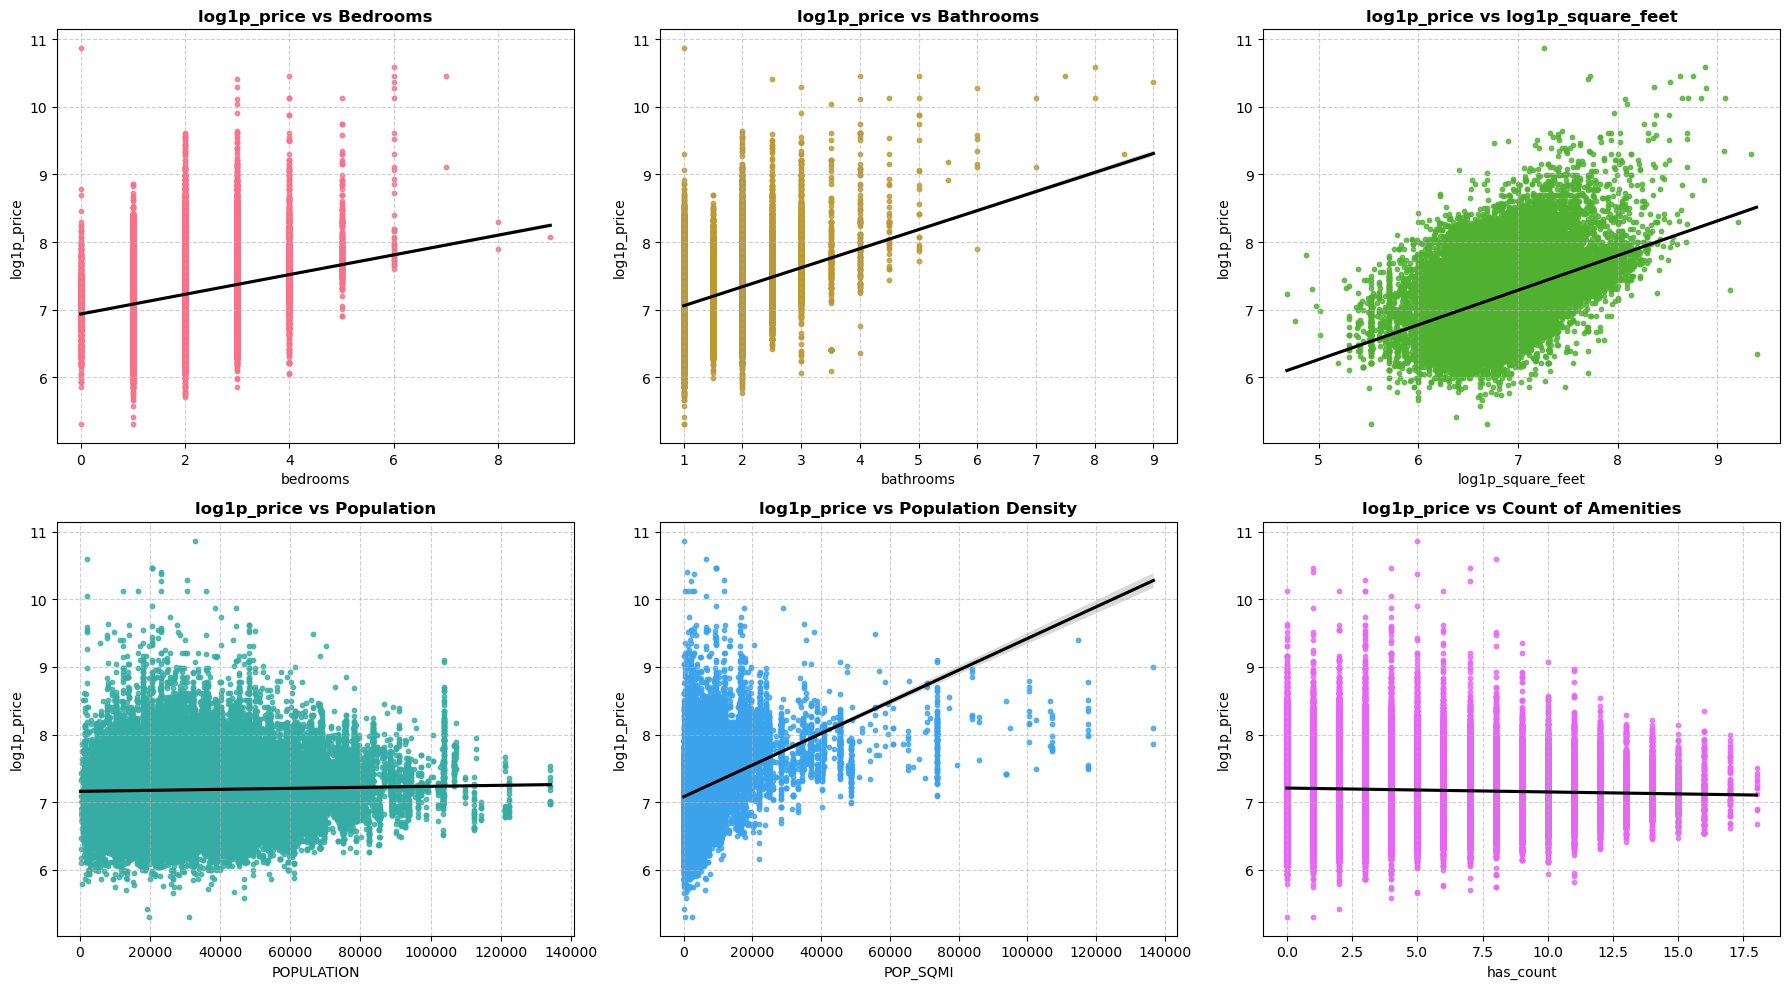

In [11]:
# Define the features and corresponding titles
features = ['bedrooms', 'bathrooms', 'log1p_square_feet', 'POPULATION', 'POP_SQMI', 'has_count']
titles = ['log1p_price vs Bedrooms', 'log1p_price vs Bathrooms', 'log1p_price vs log1p_square_feet',
          'log1p_price vs Population', 'log1p_price vs Population Density', 'log1p_price vs Count of Amenities']

plt.figure(figsize=(18, 10))

# 'husl' palette for distinct colors
colors = sns.color_palette('husl', len(features))

# Loop through features to create subplots
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create subplots in a 2x3 grid
    sns.regplot(x=feature, y='log1p_price', data=df, 
                scatter_kws={'s': 10, 'color': colors[i]}, 
                line_kws={"color": 'black'})  # Fit line
    
    plt.title(titles[i], fontsize=12, fontweight='bold')  # Set title for each subplot
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines for better visibility

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

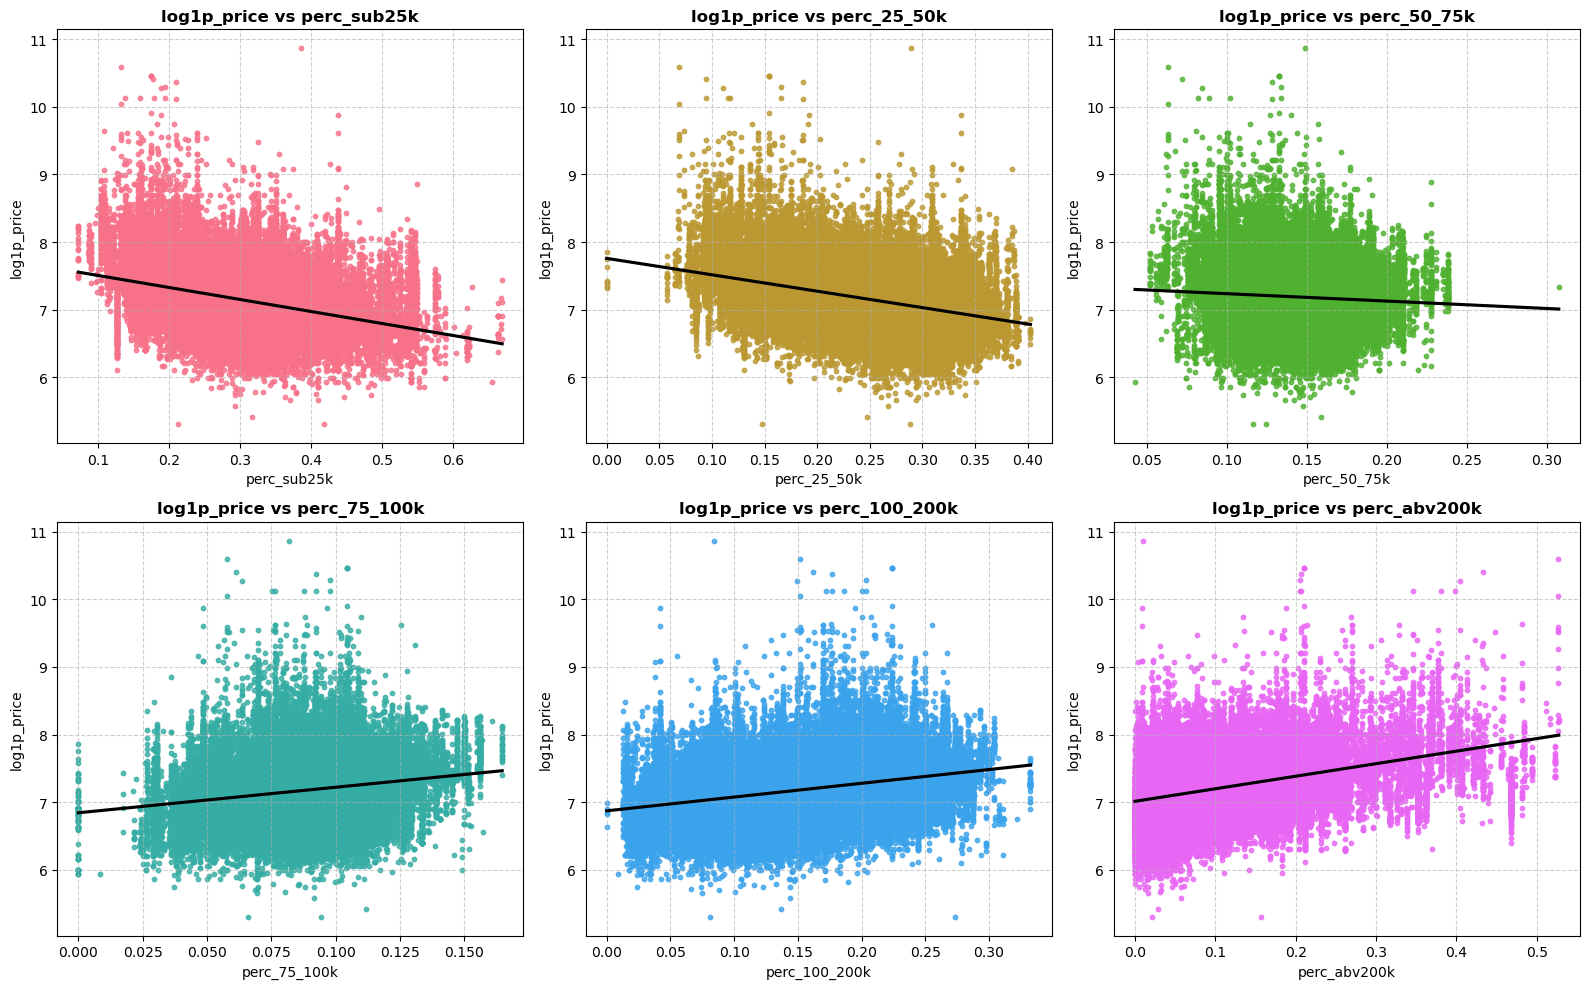

In [12]:
# Distribution of Income Percentage Features
income_features = ['perc_sub25k', 'perc_25_50k', 'perc_50_75k', 'perc_75_100k', 'perc_100_200k', 'perc_abv200k']
plt.figure(figsize=(16, 10))

# Use 'husl' palette for distinct colors
colors = sns.color_palette('husl', len(income_features))

# Create 4 subplots for income percentage features
for i, feature in enumerate(income_features):
    plt.subplot(2, 3, i + 1)  # Arranging plots in a 2x3 grid
    
    # Plot regression with distinct colors and format
    sns.regplot(x=feature, y='log1p_price', data=df, scatter_kws={'s': 10, 'color': colors[i]}, line_kws={"color": 'black'})
    
    # Add title and format it
    plt.title(f'log1p_price vs {feature}', fontsize=12, fontweight='bold')
    
    # Adding light gridlines for better visibility
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
